# <span style = "color: lightblue;font-size: 40px"> Mall Customers Clustering</span>

***

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Mall_Customers.csv' and store it in a DataFrame

In [3]:
df = pd.read_csv('Mall_Customers.csv')

### View top 5 rows

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### View info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Check for null values

In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### View unique values in Genre

In [8]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Genre

In [9]:
def gender(x):
    if x == "Male":
        return 0
    else:
        return 1

In [10]:
df['Genre'] = df['Genre'].apply(gender)

In [11]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Drop CustomerID

In [12]:
df.drop(columns = ['CustomerID'], inplace = True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## <span style = "color: orange"> Visualization</span>

### Create a scatterplot of Annual Income vs Spending Score with respect to Genre

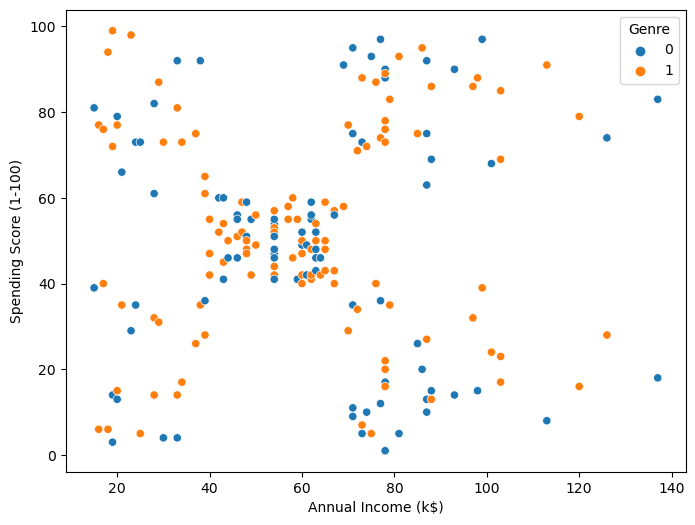

In [13]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Annual Income (k$)',  y = 'Spending Score (1-100)', data = df, hue = 'Genre')
plt.show()

### Create a scatterplot of Age vs Spending score with respect to Genre

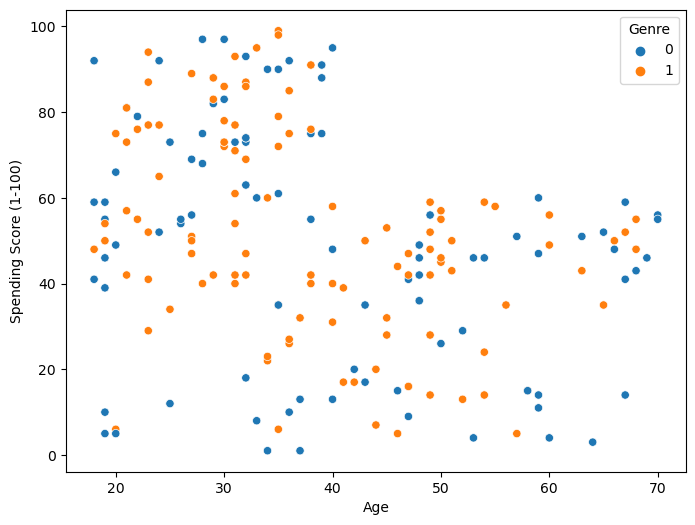

In [14]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', hue = 'Genre')
plt.show()

### Create a K-Means Clustering Model

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=3)

### Fit and Predict Clusters 

In [17]:
clusters = model.fit_predict(df)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Add Cluster values to our DataFrame

In [18]:
df['Clusters'] = clusters

In [19]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


### Check all unique values in our cluster

In [20]:
df['Clusters'].unique()

array([1, 2, 0])

## <span style = "color: green"> Visualizing the clusters </span>

#### Assign each cluster to a new Dataframe

In [21]:
df0 = df[df['Clusters'] == 0]
df1 = df[df['Clusters'] == 1]
df2 = df[df['Clusters'] == 2]

#### Plot scatterplot of each of the new dataframes with X-axis = Annual income and Y-axis = Spending Score

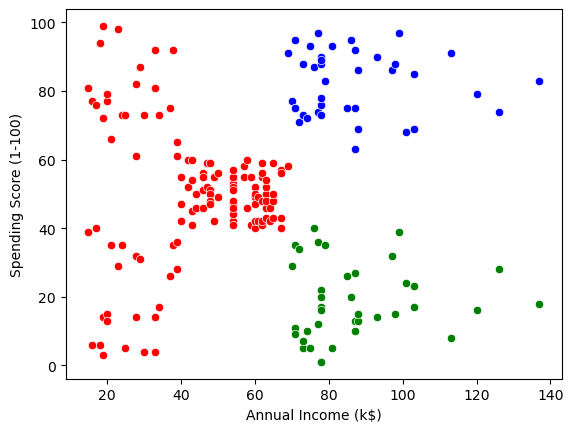

In [22]:
sns.scatterplot(data = df0, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', color = 'green')
sns.scatterplot(data = df1, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', color = 'red')
sns.scatterplot(data = df2, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', color = 'blue')
plt.show()

***